**Loading the Libraries and Data**

The project begins by loading multiple datasets, including:



*   **EMRI Data:** The primary dataset, containing geochemical measurements of various samples.
*   **Data Dictionary:** Describes the attributes of the data fields in the EMRI dataset.
*   **Limits Analytical Methods:** Provides information on detection limits for different elements and analytical methods used.
*   **QAQC Values:** Contains quality control data for reference materials used in the analysis.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/content/drive/MyDrive/EDA/Data/EMRI_Data.csv'
data_dictionary_path = '/content/drive/MyDrive/EDA/Data/EMRI_DataDictionary.csv'
limits_analytical_methods_path = '/content/drive/MyDrive/EDA/Data/Limits_AnalyticalMethods.csv'
qaqc_values_path = '/content/drive/MyDrive/EDA/Data/QAQC_Values.csv'

emri_data = pd.read_csv(data_path, encoding='ISO-8859-1')
data_dictionary = pd.read_csv(data_dictionary_path, encoding='ISO-8859-1')
limits_analytical_methods = pd.read_csv(limits_analytical_methods_path)
qaqc_values = pd.read_csv(qaqc_values_path)

emri_data.head()


<ipython-input-1-bb5aa9f501ae>:14: DtypeWarning: Columns (2,33,34,35,38,39,40,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  emri_data = pd.read_csv(data_path, encoding='ISO-8859-1')


,Lab_ID,Field_ID,Prev_Lab_ID,IGSN,Parent_IGSN,Ref_Flag,QAQC_Sample,Job_ID,PID,Proj_Name,...,Ti_ppb_ICPH2O,Tl_ppb_ICPH2O,Tm_ppb_ICPH2O,U_ppb_ICPH2O,V_ppb_ICPH2O,W_ppb_ICPH2O,Y_ppb_ICPH2O,Yb_ppb_ICPH2O,Zn_ppb_ICPH2O,Zr_ppb_ICPH2O
0,C-505148,2019-52-2,NaN,NaN,NaN,No,NaN,MRP-18627,5004.0,Marine phosphate deposits of Arkansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-505149,2019-53,NaN,NaN,NaN,No,NaN,MRP-18627,5004.0,Marine phosphate deposits of Arkansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-505150,2019-64,NaN,NaN,NaN,No,Original,MRP-18627,5004.0,Marine phosphate deposits of Arkansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-505151,2019-131,NaN,NaN,NaN,No,NaN,MRP-18627,5004.0,Marine phosphate deposits of Arkansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-505152,2019-132,NaN,NaN,NaN,No,NaN,MRP-18627,5004.0,Marine phosphate deposits of Arkansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Handling Missing Values**

The project proceeds by cleaning the dataset. Missing values in numeric columns are imputed using the column mean. This ensures that all rows have valid numeric data, which is essential for downstream analysis like correlation studies and modeling.

In [ ]:
numeric_cols = emri_data_cleaned.select_dtypes(include=[np.number]).columns

emri_data_cleaned[numeric_cols] = emri_data_cleaned[numeric_cols].fillna(emri_data_cleaned[numeric_cols].mean())

emri_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lab_ID            16266 non-null  object 
 1   Field_ID          16266 non-null  object 
 2   Ref_Flag          16266 non-null  object 
 3   Job_ID            16266 non-null  object 
 4   PID               16266 non-null  float64
 5   Proj_Name         16266 non-null  object 
 6   Affiliation       16266 non-null  object 
 7   Date_Submitted    16266 non-null  object 
 8   Date_Approved     16266 non-null  object 
 9   Lat_WGS84         16266 non-null  float64
 10  Long_WGS84        16266 non-null  float64
 11  Orig_Lat          16266 non-null  float64
 12  Orig_Long         16266 non-null  float64
 13  Orig_Datum        14856 non-null  object 
 14  Country           14856 non-null  object 
 15  State             14847 non-null  object 
 16  Location_Desc     12618 non-null  object

<ipython-input-3-06d969a79ad1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emri_data_cleaned[numeric_cols] = emri_data_cleaned[numeric_cols].fillna(emri_data_cleaned[numeric_cols].mean())


**Outlier Detection and Removal**

To improve data quality, outliers in the numeric columns are detected using Z-scores and removed if they exceed a threshold (e.g., 3 standard deviations from the mean). This step ensures the analysis is not skewed by extreme values​.

In [ ]:
from scipy import stats

numeric_cols = emri_data_cleaned.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(emri_data_cleaned[numeric_cols]))

emri_data_no_outliers = emri_data_cleaned[(z_scores < 3).all(axis=1)]
emri_data_no_outliers.describe()


,PID,Lat_WGS84,Long_WGS84,Orig_Lat,Orig_Long,Al_pct_ICP60,Ca_pct_ICP60,Fe_pct_ICP60,K_pct_ICP60,Mg_pct_ICP60,...,K2O_pct_WDX,LOI_pct_WDX,MgO_pct_WDX,MnO_pct_WDX,Na2O_pct_WDX,P2O5_pct_WDX,SiO2_pct_WDX,SrO_pct_WDX,TiO2_pct_WDX,V2O5_pct_WDX
count,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,...,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000
mean,17809.157724,53.529607,-125.952314,53.529603,-125.952287,6.877857,2.781775,3.670210,2.000029,1.194542,...,2.541150,10.204934,2.603392,0.198852,1.390870,0.696507,56.139811,0.029498,0.737440,0.020089
std,7602.090570,12.059680,26.947050,12.059686,26.947063,1.671679,2.220094,1.312152,0.718193,0.649565,...,1.040807,5.830379,1.673064,0.222371,0.945341,0.703739,11.872679,0.023650,0.344746,0.020528
min,5003.000000,31.876460,-158.997900,31.876460,-158.997900,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.270000,-0.010000,-0.010000,-0.010000
25%,20002.000000,40.135000,-147.095600,40.134990,-147.095600,6.609474,1.120000,3.190000,1.630000,0.850000,...,2.424998,6.500000,1.390000,0.060000,1.289499,0.150000,51.211638,0.020000,0.680000,0.020000
50%,20005.000000,61.841000,-141.605600,61.841000,-141.605600,6.609474,2.730000,3.856441,1.985423,1.368478,...,2.424998,12.201749,3.160980,0.273187,1.289499,1.037418,51.211638,0.036312,0.742272,0.022901
75%,20005.000000,64.453800,-106.288400,64.453800,-106.288400,7.260000,4.087597,3.856441,2.030000,1.368478,...,2.510000,12.201749,3.160980,0.273187,1.289499,1.037418,62.335000,0.036312,0.742272,0.022901
max,40007.000000,67.617000,-67.821150,67.617000,-67.821150,13.800000,22.100000,12.900000,4.910000,6.130000,...,6.850000,42.300000,14.760000,4.450000,4.990000,9.110000,99.740000,0.450000,3.690000,0.210000


**Descriptive Statistics and Correlation Analysis**

The next step involves generating summary statistics for the numeric data and creating a correlation heatmap to understand relationships between geochemical elements. A Variance Inflation Factor (VIF) analysis is also conducted to detect multicollinearity among the features, which can negatively affect model performance.

The features with high VIF values are dropped to reduce redundancy​

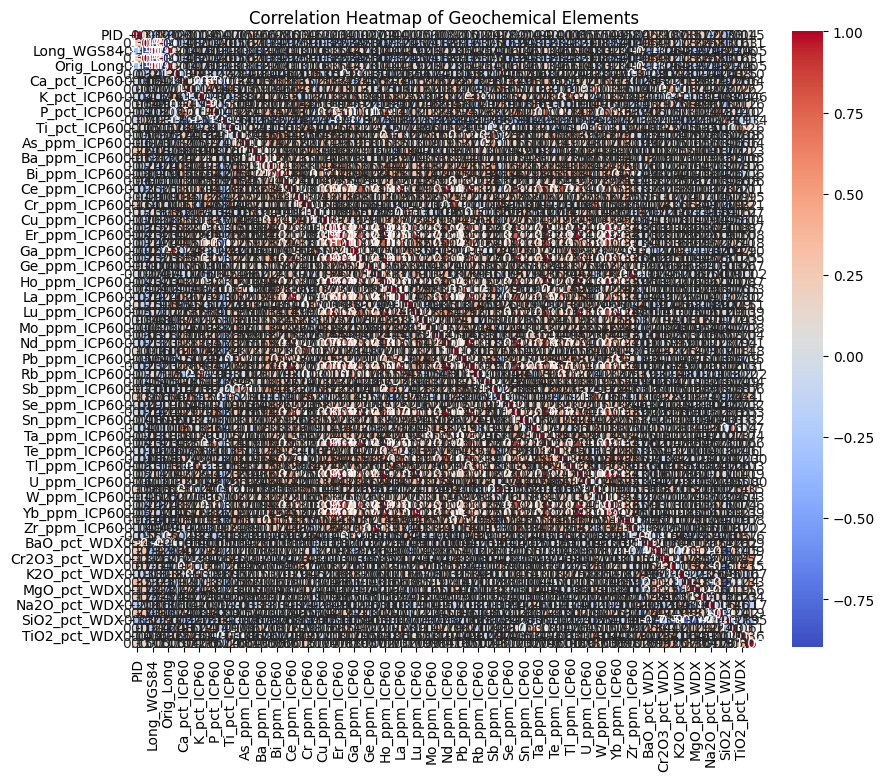

In [ ]:
numeric_cols = emri_data_no_outliers.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Geochemical Elements')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_cols = emri_data_no_outliers.select_dtypes(include=[np.number])

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

vif_data = calculate_vif(numeric_cols)
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
3,Orig_Lat,4.421796e+12
1,Lat_WGS84,4.421796e+12
2,Long_WGS84,1.144643e+12
4,Orig_Long,1.144643e+12
32,Ho_ppm_ICP60,1.892519e+03
...,...,...
19,Cd_ppm_ICP60,2.787058e+00
68,Cr2O3_pct_WDX,2.464730e+00
73,MnO_pct_WDX,2.437222e+00
38,Mo_ppm_ICP60,1.876726e+00


In [ ]:
high_vif_threshold = 1000
high_vif_columns = vif_data[vif_data["VIF"] > high_vif_threshold]["feature"]
emri_data_reduced = emri_data_no_outliers.drop(columns=high_vif_columns)
emri_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12335 entries, 0 to 16265
Data columns (total 87 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lab_ID            12335 non-null  object 
 1   Field_ID          12335 non-null  object 
 2   Ref_Flag          12335 non-null  object 
 3   Job_ID            12335 non-null  object 
 4   PID               12335 non-null  float64
 5   Proj_Name         12335 non-null  object 
 6   Affiliation       12335 non-null  object 
 7   Date_Submitted    12335 non-null  object 
 8   Date_Approved     12335 non-null  object 
 9   Orig_Datum        11220 non-null  object 
 10  Country           11220 non-null  object 
 11  State             11220 non-null  object 
 12  Location_Desc     9372 non-null   object 
 13  Sample_Type       12335 non-null  object 
 14  Sample_Desc       10709 non-null  object 
 15  Date_Collected    10910 non-null  object 
 16  Method_Collected  11223 non-null  object 
 17

In [ ]:
vif_data_reduced = calculate_vif(emri_data_reduced.select_dtypes(include=[np.number]))

vif_data_reduced.sort_values(by="VIF", ascending=False)


,feature,VIF
23,Gd_ppm_ICP60,301.057614
25,Hf_ppm_ICP60,281.211275
40,Sm_ppm_ICP60,279.368998
52,Zr_ppm_ICP60,258.924577
7,Si_pct_ICP60,226.958666
...,...,...
15,Cd_ppm_ICP60,2.782980
56,Cr2O3_pct_WDX,2.445347
61,MnO_pct_WDX,2.398779
31,Mo_ppm_ICP60,1.856249


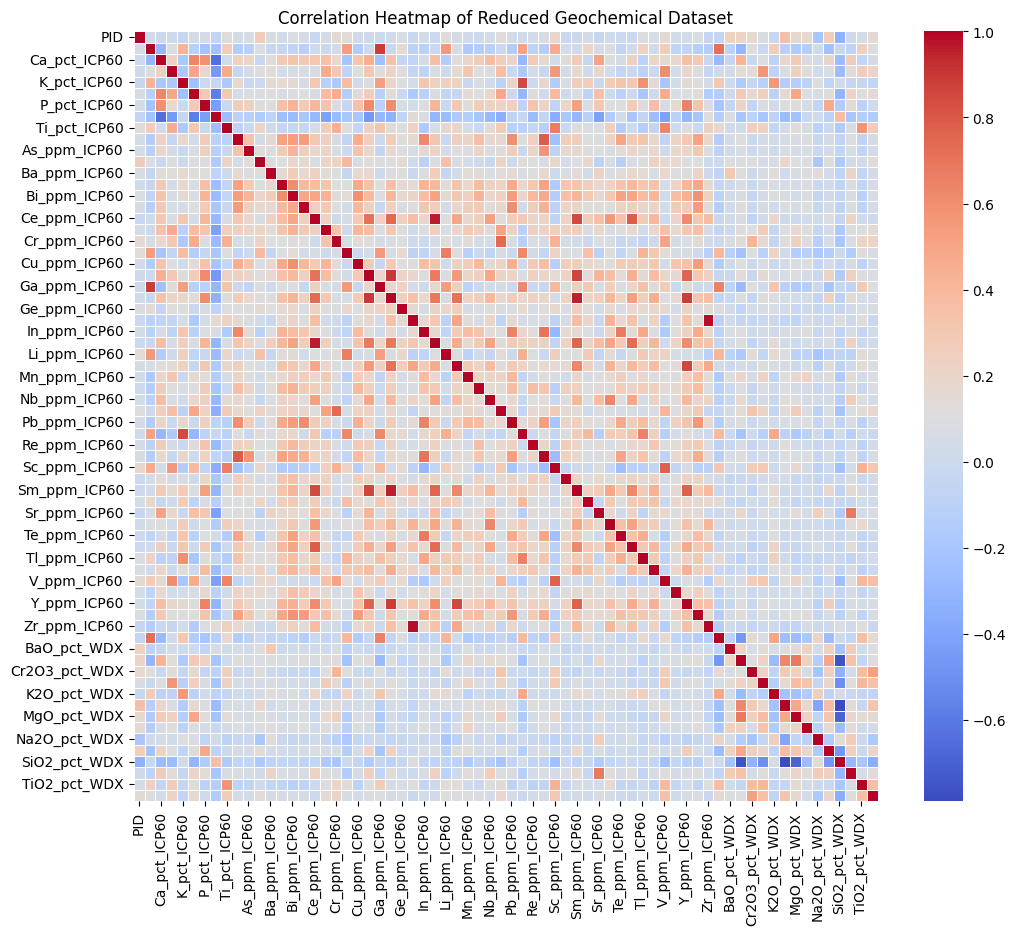

In [ ]:
numeric_cols_reduced = emri_data_reduced.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols_reduced.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Reduced Geochemical Dataset')
plt.show()


In [ ]:
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

correlation_pairs['Abs_Correlation'] = correlation_pairs['Correlation'].abs()
top_correlations = correlation_pairs.sort_values(by='Abs_Correlation', ascending=False).head(10)

top_correlations

,Feature 1,Feature 2,Correlation,Abs_Correlation
1752,Hf_ppm_ICP60,Zr_ppm_ICP60,0.984063,0.984063
3561,Zr_ppm_ICP60,Hf_ppm_ICP60,0.984063,0.984063
1852,La_ppm_ICP60,Ce_ppm_ICP60,0.959701,0.959701
1115,Ce_ppm_ICP60,La_ppm_ICP60,0.959701,0.959701
2743,Sm_ppm_ICP60,Gd_ppm_ICP60,0.953546,0.953546
1604,Gd_ppm_ICP60,Sm_ppm_ICP60,0.953546,0.953546
1585,Gd_ppm_ICP60,Eu_ppm_ICP60,0.897520,0.897520
1451,Eu_ppm_ICP60,Gd_ppm_ICP60,0.897520,0.897520
1614,Gd_ppm_ICP60,Y_ppm_ICP60,0.886999,0.886999
3423,Y_ppm_ICP60,Gd_ppm_ICP60,0.886999,0.886999


In [ ]:
descriptive_stats = numeric_cols_reduced.describe()
descriptive_stats

,PID,Al_pct_ICP60,Ca_pct_ICP60,Fe_pct_ICP60,K_pct_ICP60,Mg_pct_ICP60,P_pct_ICP60,Si_pct_ICP60,Ti_pct_ICP60,Ag_ppm_ICP60,...,K2O_pct_WDX,LOI_pct_WDX,MgO_pct_WDX,MnO_pct_WDX,Na2O_pct_WDX,P2O5_pct_WDX,SiO2_pct_WDX,SrO_pct_WDX,TiO2_pct_WDX,V2O5_pct_WDX
count,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,...,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000
mean,17809.157724,6.877857,2.781775,3.670210,2.000029,1.194542,0.203015,29.089395,0.496542,0.821244,...,2.541150,10.204934,2.603392,0.198852,1.390870,0.696507,56.139811,0.029498,0.737440,0.020089
std,7602.090570,1.671679,2.220094,1.312152,0.718193,0.649565,0.227801,3.827966,0.176492,2.904995,...,1.040807,5.830379,1.673064,0.222371,0.945341,0.703739,11.872679,0.023650,0.344746,0.020528
min,5003.000000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,7.370000,-0.010000,-1.000000,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.270000,-0.010000,-0.010000,-0.010000
25%,20002.000000,6.609474,1.120000,3.190000,1.630000,0.850000,0.060000,27.382822,0.440000,-1.000000,...,2.424998,6.500000,1.390000,0.060000,1.289499,0.150000,51.211638,0.020000,0.680000,0.020000
50%,20005.000000,6.609474,2.730000,3.856441,1.985423,1.368478,0.100000,27.382822,0.503760,-1.000000,...,2.424998,12.201749,3.160980,0.273187,1.289499,1.037418,51.211638,0.036312,0.742272,0.022901
75%,20005.000000,7.260000,4.087597,3.856441,2.030000,1.368478,0.355578,31.200000,0.510000,2.693587,...,2.510000,12.201749,3.160980,0.273187,1.289499,1.037418,62.335000,0.036312,0.742272,0.022901
max,40007.000000,13.800000,22.100000,12.900000,4.910000,6.130000,3.650000,47.500000,2.030000,188.000000,...,6.850000,42.300000,14.760000,4.450000,4.990000,9.110000,99.740000,0.450000,3.690000,0.210000


**Distribution Analysis (Histograms and Box Plots)**

To understand the distribution of geochemical features and identify key characteristics such as central tendency, variability, and outliers, the project incorporates a variety of visualizations:

*   **Histograms:** Visualize the frequency distribution of each feature, showing how data points are spread across different value ranges. This helps in understanding the overall shape of the data (e.g., normal, skewed, bimodal distributions).

*   **Box Plots:** Used to identify the spread, central values (median), and potential outliers in the data. These plots give a clear picture of how geochemical elements vary within the dataset and flag any anomalies that may affect the analysis.
*   **Density Plots:** Provide smooth estimates of the distribution, highlighting the shape and skewness of the data. Density plots are particularly useful for comparing multiple features simultaneously.


*   **Violin Plots:** A combination of box plots and density plots, violin plots are included to offer a more detailed view of data distribution. They not only show the range and median of the data but also visualize the probability density, making it easier to spot multimodal distributions or any unusual data patterns.

*   **Pair Plots:** Visualize the relationships between multiple geochemical features. Pair plots show scatter plots for feature pairs and histograms along the diagonal, helping to explore potential correlations and multivariate relationships between different geochemical elements.
*   **Radar Chart:** A Radar Chart, also known as a Spider Chart, is used to compare multiple variables simultaneously on a single plot. Each axis represents a different geochemical feature, and the values for each sample are plotted along these axes. The Radar Chart allows for a quick, visual comparison of different features, making it easier to spot similarities and differences across various geochemical measurements. This chart is especially useful in visualizing the range and variance of features across multiple samples.

These comprehensive distribution analyses provide valuable insights into how individual geochemical elements behave in the dataset, revealing patterns, anomalies, and relationships that are critical for further geochemical or geological analysis.




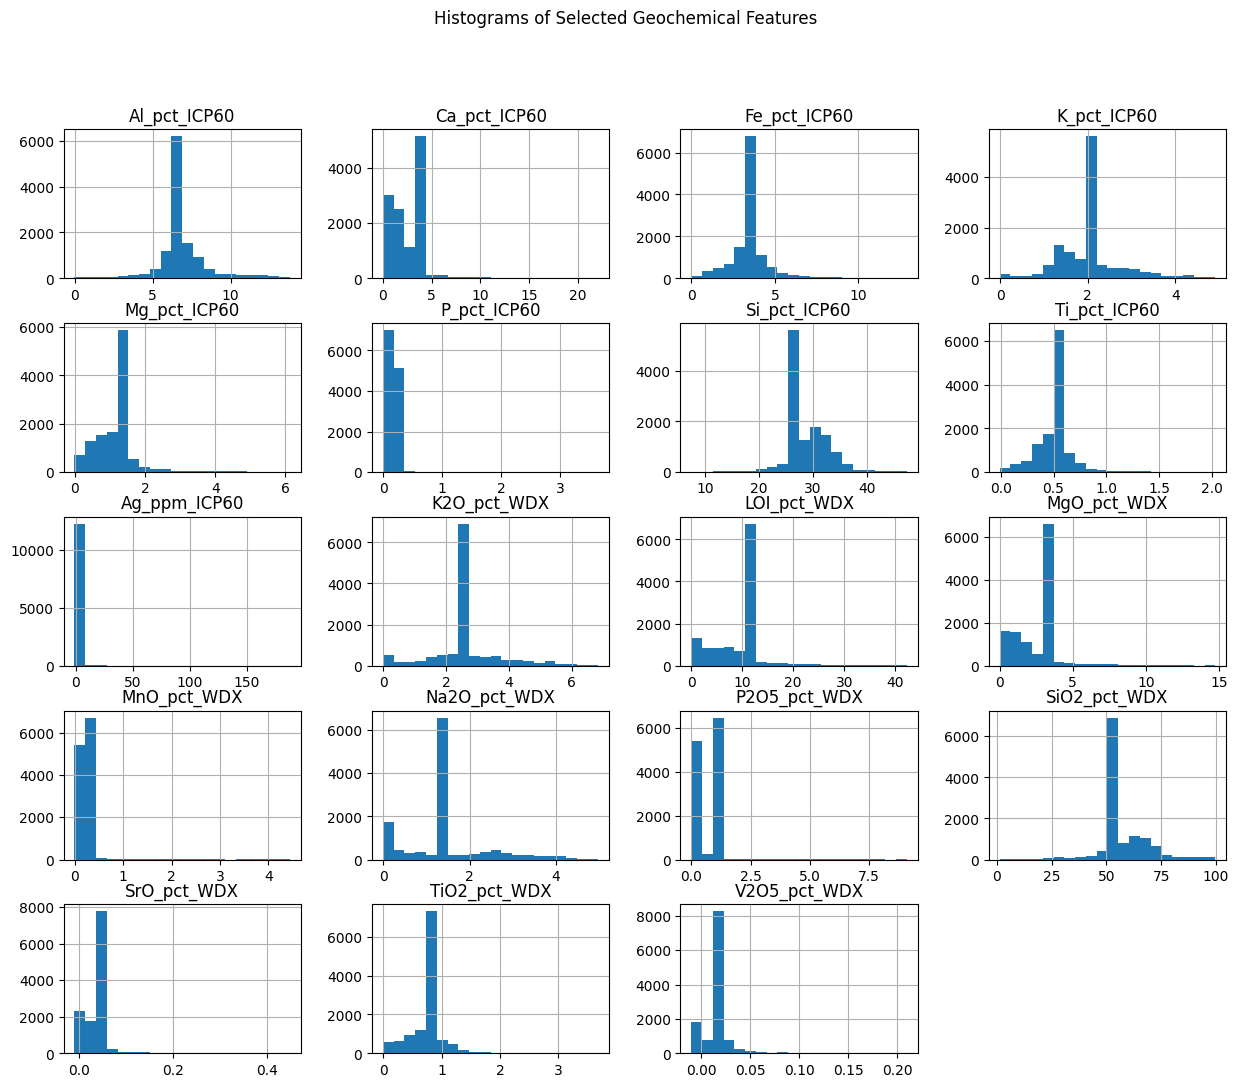

In [ ]:
features = ['Al_pct_ICP60', 'Ca_pct_ICP60', 'Fe_pct_ICP60', 'K_pct_ICP60',
            'Mg_pct_ICP60', 'P_pct_ICP60', 'Si_pct_ICP60', 'Ti_pct_ICP60',
            'Ag_ppm_ICP60', 'K2O_pct_WDX', 'LOI_pct_WDX', 'MgO_pct_WDX',
            'MnO_pct_WDX', 'Na2O_pct_WDX', 'P2O5_pct_WDX', 'SiO2_pct_WDX',
            'SrO_pct_WDX', 'TiO2_pct_WDX', 'V2O5_pct_WDX']

features_in_data = [feature for feature in features if feature in numeric_cols_reduced.columns]

numeric_cols_reduced[features_in_data].hist(bins=20, figsize=(15, 12))
plt.suptitle('Histograms of Selected Geochemical Features')
plt.show()


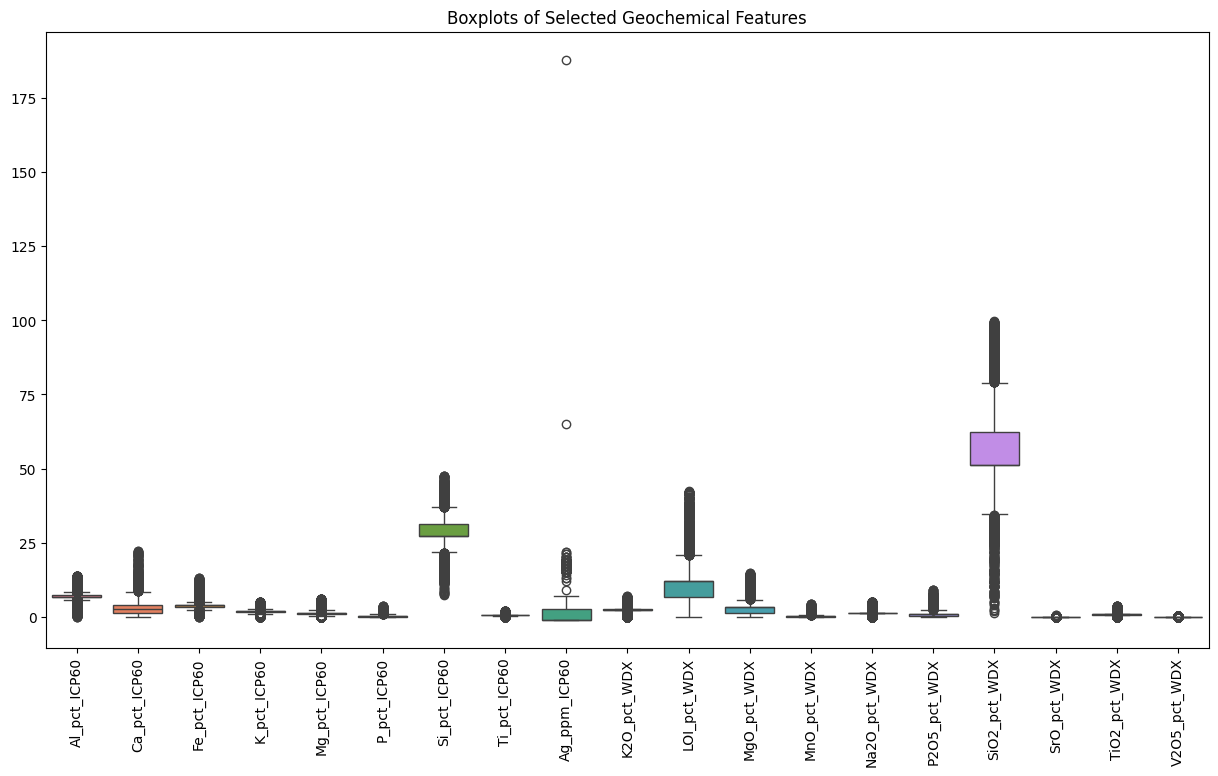

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols_reduced[features_in_data])
plt.title('Boxplots of Selected Geochemical Features')
plt.xticks(rotation=90)
plt.show()

<ipython-input-28-38a50deb3ac3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numeric_cols_reduced[feature].dropna(), shade=True)
<ipython-input-28-38a50deb3ac3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numeric_cols_reduced[feature].dropna(), shade=True)
<ipython-input-28-38a50deb3ac3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numeric_cols_reduced[feature].dropna(), shade=True)
<ipython-input-28-38a50deb3ac3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=nume

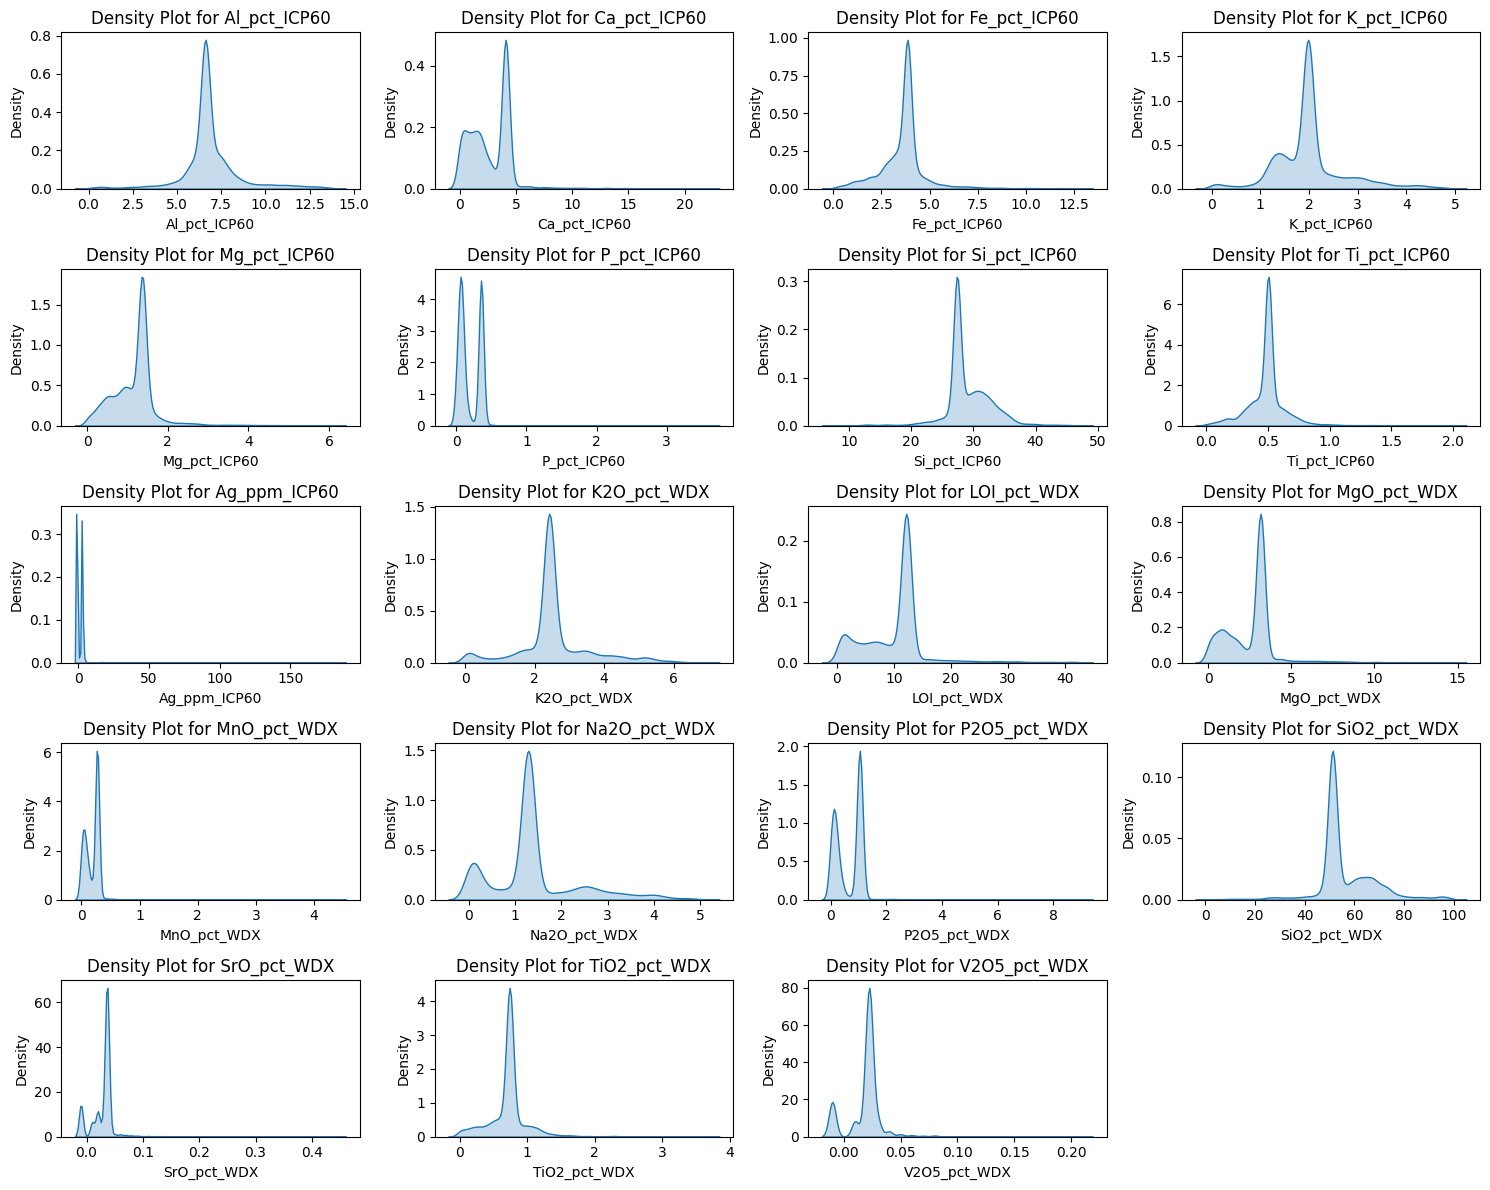

In [ ]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_in_data, 1):
    plt.subplot(5, 4, i)
    sns.kdeplot(data=numeric_cols_reduced[feature].dropna(), shade=True)
    plt.title(f'Density Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
data_for_scatter = emri_data_reduced[features].dropna()
sns.pairplot(data_for_scatter, diag_kind='kde', plot_kws={'alpha':0.5, 's':30})
plt.suptitle('Scatter Plot Matrix for Selected Features', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Figure size 1500x1000 with 0 Axes>

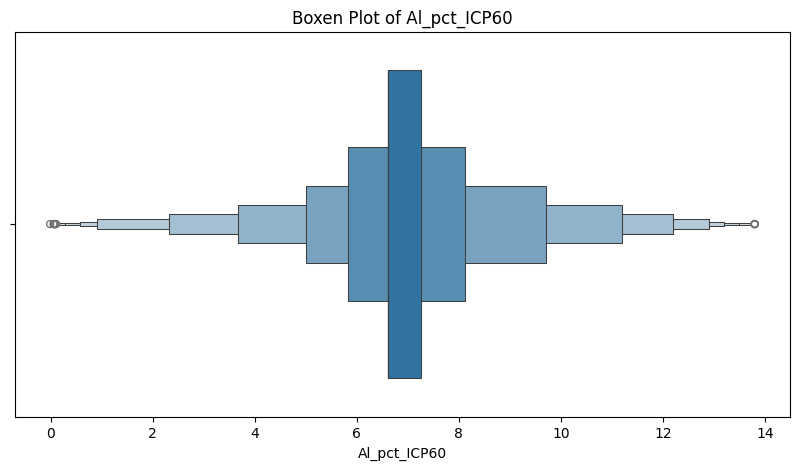

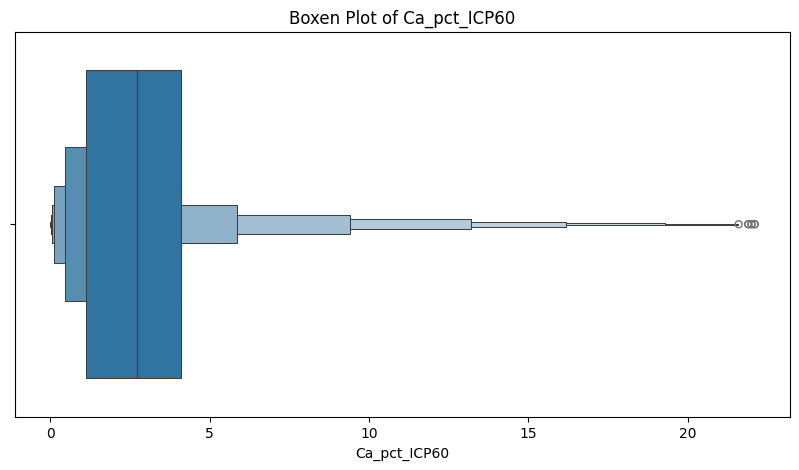

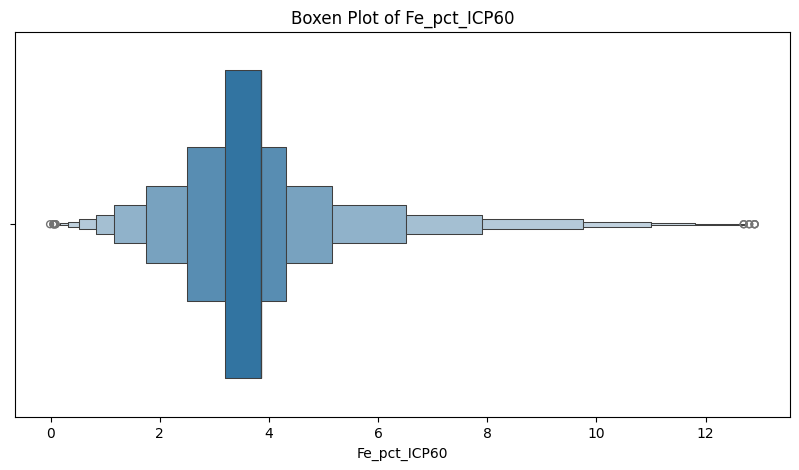

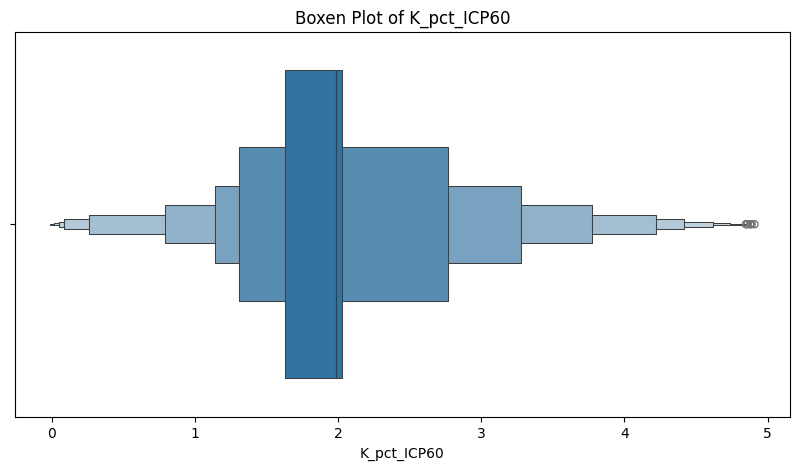

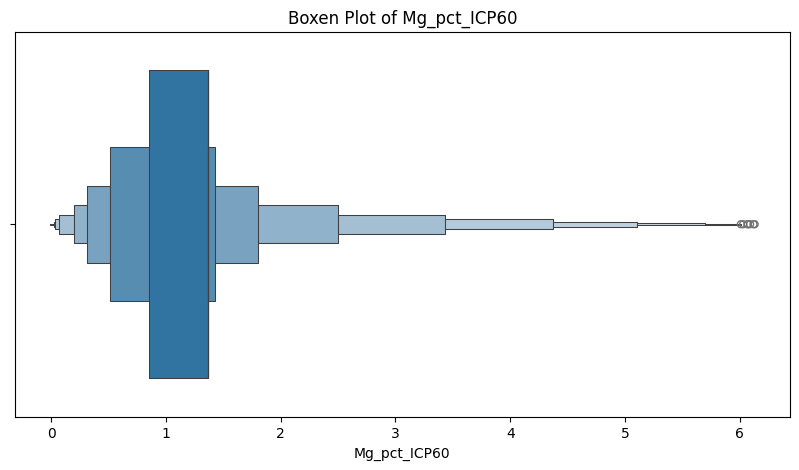

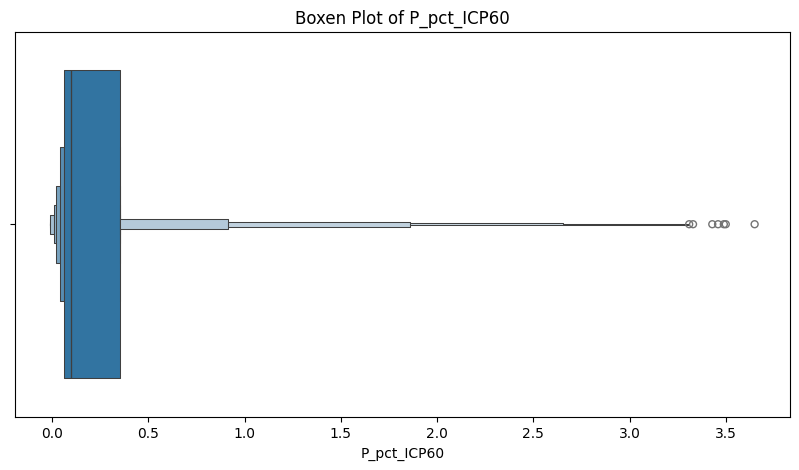

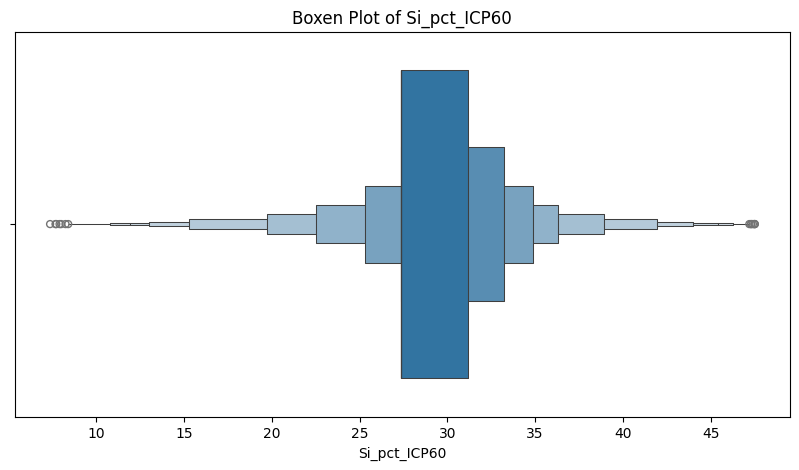

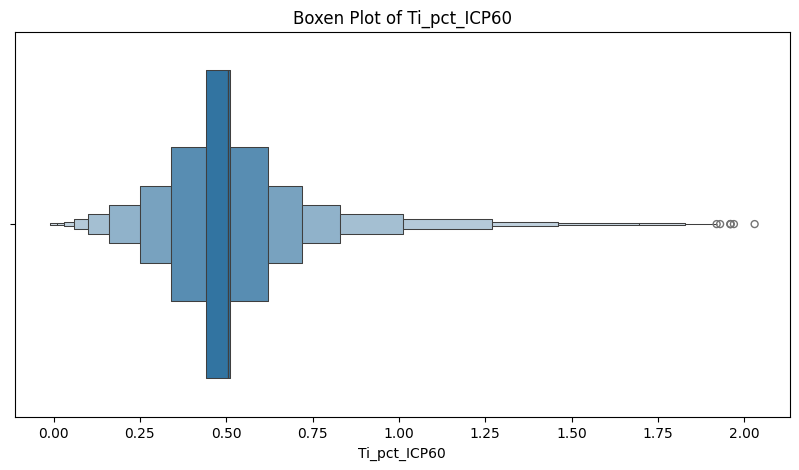

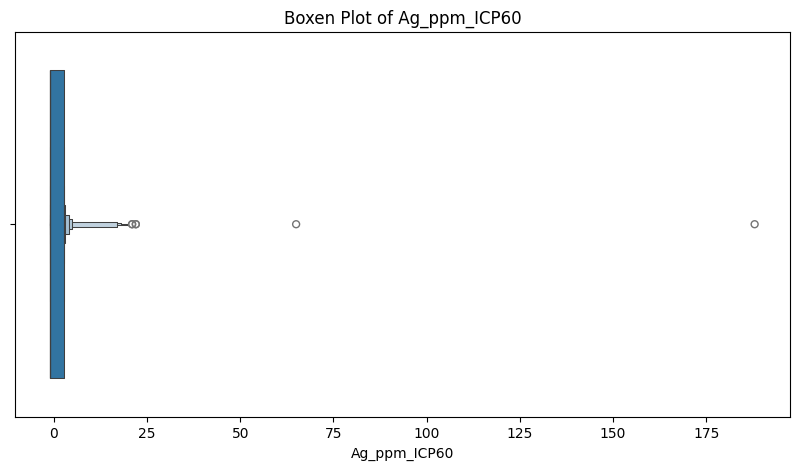

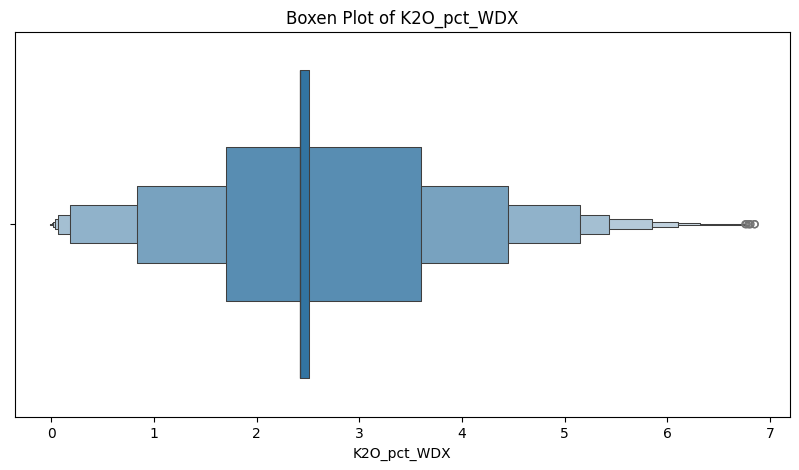

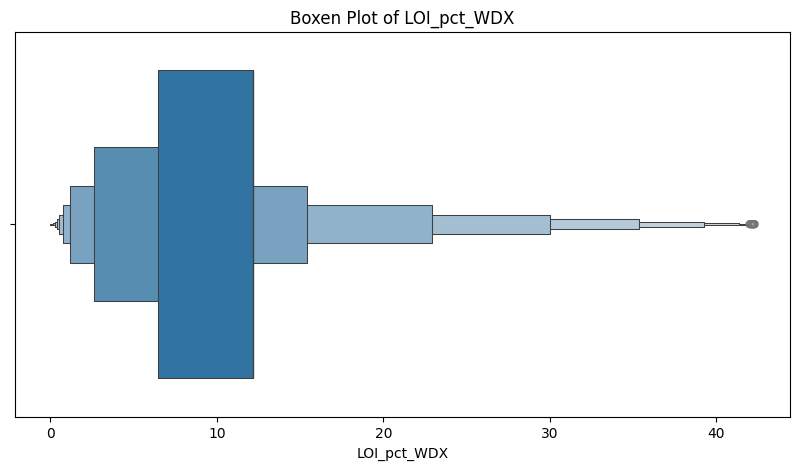

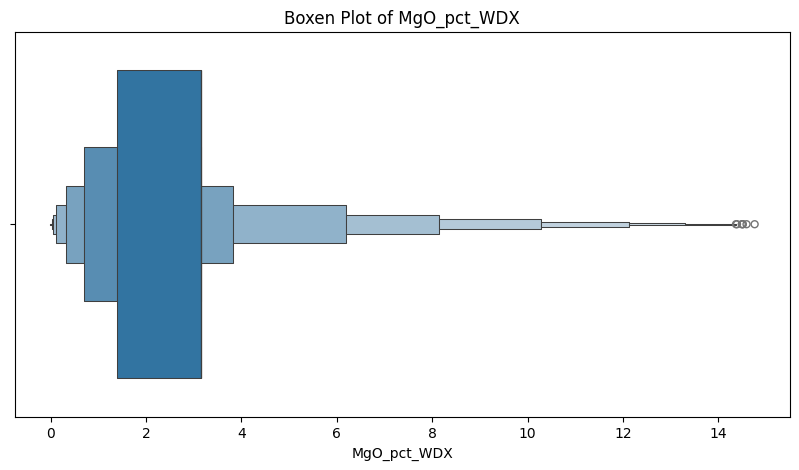

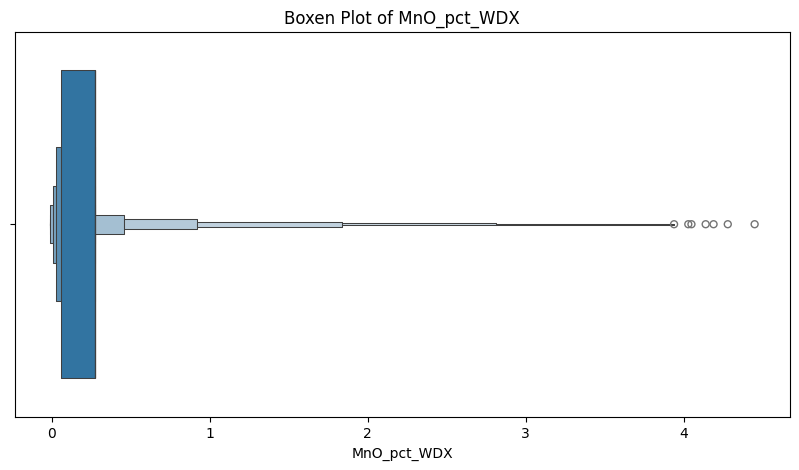

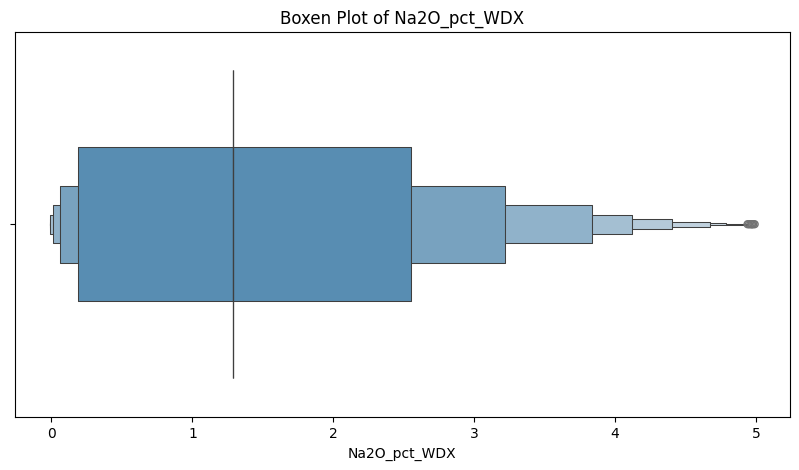

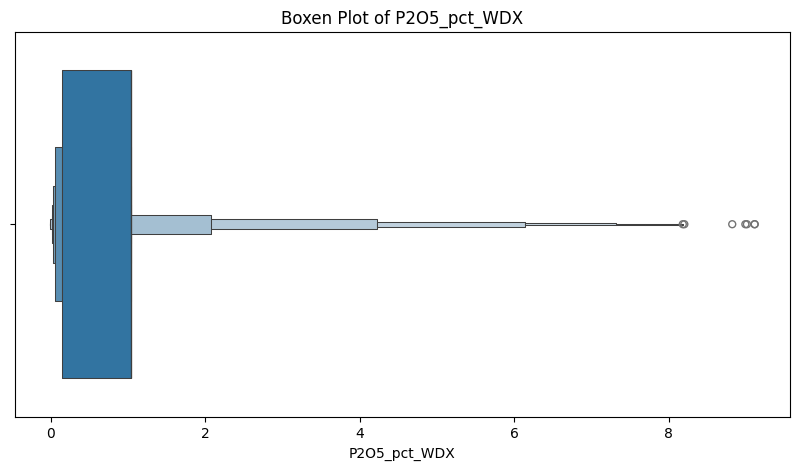

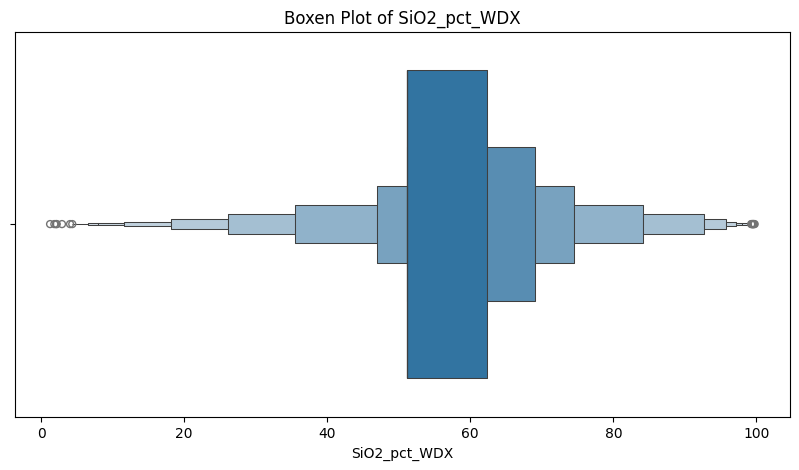

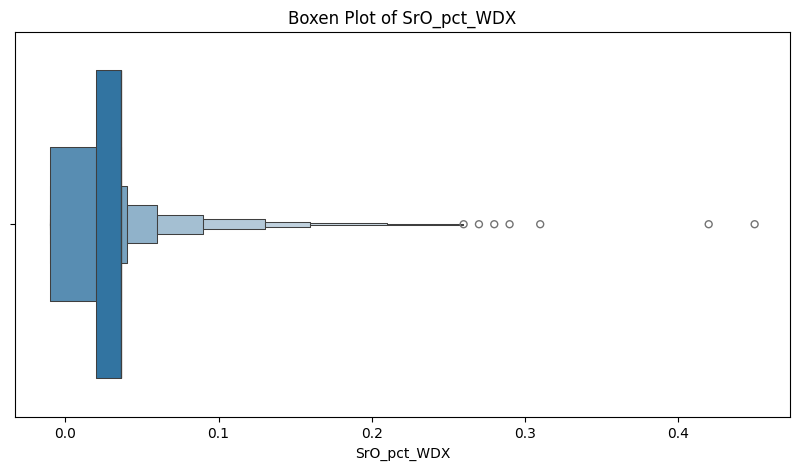

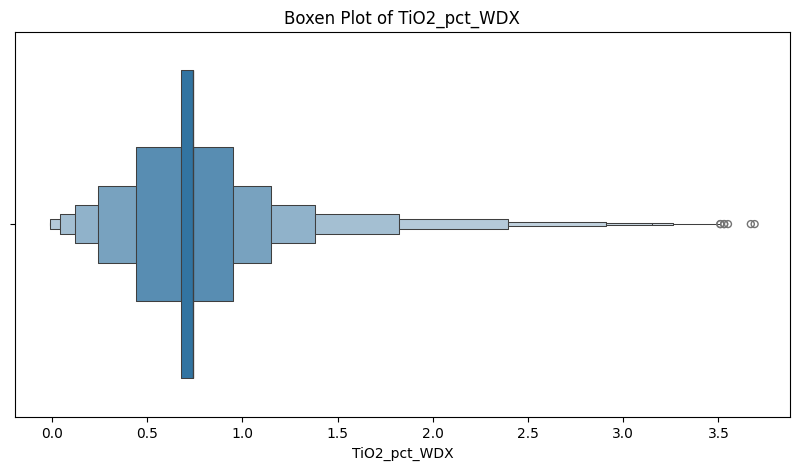

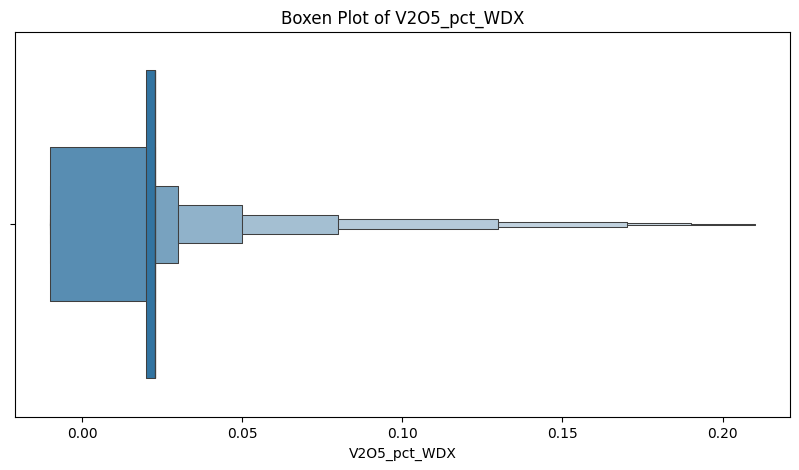

In [33]:
emri_data_filtered_features = emri_data_reduced[features]

plt.figure(figsize=(15, 10))
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxenplot(x=emri_data_filtered_features[feature])
    plt.title(f'Boxen Plot of {feature}')
    plt.show()

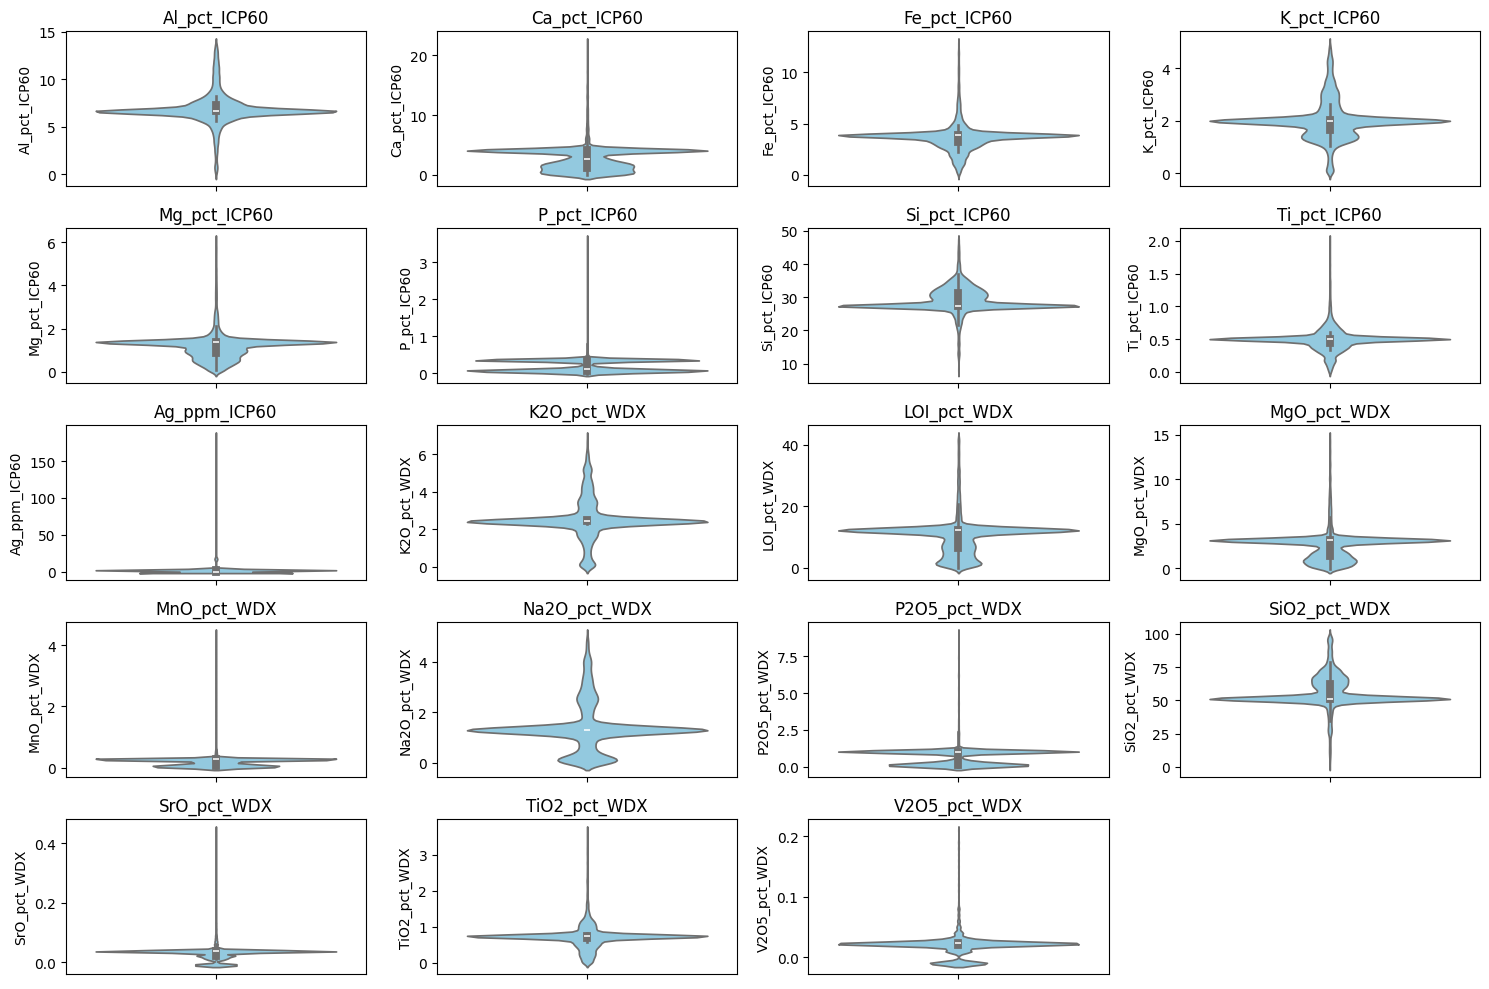

In [35]:
features_violin = ['Al_pct_ICP60', 'Ca_pct_ICP60', 'Fe_pct_ICP60', 'K_pct_ICP60',
                   'Mg_pct_ICP60', 'P_pct_ICP60', 'Si_pct_ICP60', 'Ti_pct_ICP60',
                   'Ag_ppm_ICP60', 'K2O_pct_WDX', 'LOI_pct_WDX', 'MgO_pct_WDX',
                   'MnO_pct_WDX', 'Na2O_pct_WDX', 'P2O5_pct_WDX', 'SiO2_pct_WDX',
                   'SrO_pct_WDX', 'TiO2_pct_WDX', 'V2O5_pct_WDX']

features_violin_in_data = [feature for feature in features_violin if feature in emri_data_reduced.columns]
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_violin_in_data):
    plt.subplot(5, 4, i+1)
    sns.violinplot(y=emri_data_reduced[feature], color='skyblue')
    plt.title(feature)

plt.tight_layout()
plt.show()

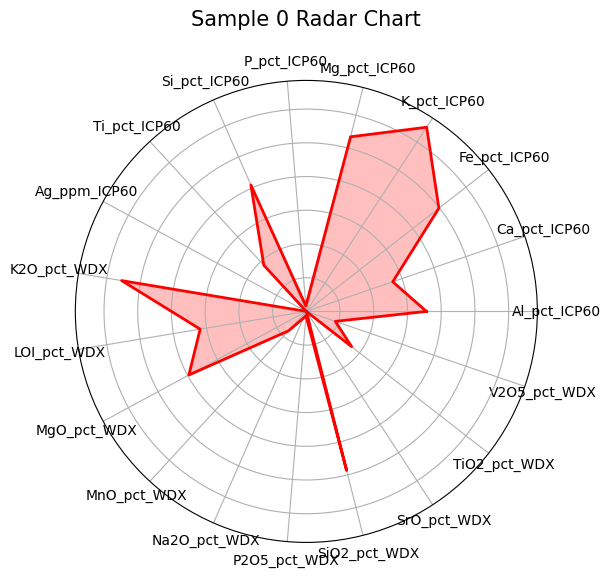

In [36]:
features = ['Al_pct_ICP60', 'Ca_pct_ICP60', 'Fe_pct_ICP60', 'K_pct_ICP60',
            'Mg_pct_ICP60', 'P_pct_ICP60', 'Si_pct_ICP60', 'Ti_pct_ICP60',
            'Ag_ppm_ICP60', 'K2O_pct_WDX', 'LOI_pct_WDX', 'MgO_pct_WDX',
            'MnO_pct_WDX', 'Na2O_pct_WDX', 'P2O5_pct_WDX', 'SiO2_pct_WDX',
            'SrO_pct_WDX', 'TiO2_pct_WDX', 'V2O5_pct_WDX']

def create_radar_chart(data, features, title):

    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data += data[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, data, color='red', alpha=0.25)
    ax.plot(angles, data, color='red', linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)

    plt.title(title, size=15, color='black', y=1.1)

    plt.show()

sample_index = 0
data_for_radar = emri_data_reduced.loc[sample_index, features].values

min_values = emri_data_reduced[features].min()
max_values = emri_data_reduced[features].max()
normalized_data = (data_for_radar - min_values) / (max_values - min_values)

create_radar_chart(normalized_data.tolist(), features, f"Sample {sample_index} Radar Chart")


**Geospatial Visualization**

The notebook uses Folium for geospatial visualization of the sample data, plotting sample locations on an interactive map based on latitude and longitude. This helps visualize the geographical distribution of the samples

In [ ]:
import folium
from folium.plugins import MarkerCluster

geo_data_filtered = emri_data_original.dropna(subset=[lat_column, long_column])

base_map = folium.Map(location=[20, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(base_map)

for _, row in geo_data_filtered.iterrows():
    folium.Marker(location=[row[lat_column], row[long_column]],
                  popup=row['PID'],
                  icon=folium.Icon(color='red')).add_to(marker_cluster)

min_lat, max_lat = geo_data_filtered[lat_column].min(), geo_data_filtered[lat_column].max()
min_long, max_long = geo_data_filtered[long_column].min(), geo_data_filtered[long_column].max()

base_map.fit_bounds([[min_lat, min_long], [max_lat, max_long]])

base_map


Output hidden; open in https://colab.research.google.com to view.

**Encoding Categorical Variables**

The categorical columns are encoded using Label Encoding and One-Hot Encoding for machine learning models. High-cardinality columns (those with too many unique values) are excluded from One-Hot Encoding to prevent data sparsity​.

In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data_path = '/content/drive/MyDrive/EDA/Data/EMRI_Data.csv'
emri_data_original = pd.read_csv(data_path, encoding='ISO-8859-1')
categorical_columns = emri_data_original.select_dtypes(include=['object']).columns

print("Categorical columns identified:", categorical_columns)

emri_data_encoded = emri_data_original.copy()
label_encoder = LabelEncoder()
for column in categorical_columns:
    if emri_data_encoded[column].nunique() <= 10:
        emri_data_encoded[column] = label_encoder.fit_transform(emri_data_encoded[column])

emri_data_encoded = pd.get_dummies(emri_data_encoded, columns=[col for col in categorical_columns if emri_data_encoded[col].dtype == 'object'], drop_first=True)
emri_data_encoded.head()


<ipython-input-37-fb09cd9ff6b0>:7: DtypeWarning: Columns (2,33,34,35,38,39,40,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  emri_data_original = pd.read_csv(data_path, encoding='ISO-8859-1')


Categorical columns identified: Index(['Lab_ID', 'Field_ID', 'Prev_Lab_ID', 'Ref_Flag', 'QAQC_Sample',
       'Job_ID', 'Proj_Name', 'Affiliation', 'Date_Submitted', 'Date_Approved',
       'Orig_Datum', 'Country', 'State', 'Location_Desc', 'Sample_Type',
       'Sample_Desc', 'Date_Collected', 'Method_Collected', 'Sample_Source',
       'Sample_Depth', 'Rock_Type', 'Rock_Name', 'Geologic_Age',
       'Stratigraphy', 'Igneous_Form', 'Depositional_Env', 'Metamorphism',
       'Facies_Grade', 'Meta_SourceRk', 'Mineralization', 'Alteration',
       'Land_Cover', 'Soil_Parent', 'Soil_Horizon', 'Organic_Conc',
       'Soil_Moisture', 'Soil_Drainage', 'Sample_Prep', 'Analytic_Mthds'],
      dtype='object')


,IGSN,Parent_IGSN,Ref_Flag,PID,Lat_WGS84,Long_WGS84,Orig_Lat,Orig_Long,Orig_Datum,Country,...,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F; C_TOTAL-S,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_ISE-F,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_TOTAL-S,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-ORGANIC-C; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-FA_ICPMS-AU,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C_FA_AU-PD-PT; C_ISE-F
0,NaN,NaN,0,5004.0,35.886,-91.853,35.886,-91.853,2,3,...,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,0,5004.0,35.886,-91.853,35.886,-91.853,2,3,...,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,0,5004.0,35.875,-91.822,35.875,-91.822,2,3,...,False,False,False,False,False,False,False,False,False,False
3,NaN,NaN,0,5004.0,35.907,-91.765,35.907,-91.765,2,3,...,False,False,False,False,False,False,False,False,False,False
4,NaN,NaN,0,5004.0,35.911,-91.763,35.911,-91.763,2,3,...,False,False,False,False,False,False,False,False,False,False


In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data_path = '/content/drive/MyDrive/EDA/Data/EMRI_Data.csv'
emri_data_original = pd.read_csv(data_path, encoding='ISO-8859-1', low_memory=False)

for column in emri_data_original.columns:
    if emri_data_original[column].dtype == 'object':
        emri_data_original[column] = emri_data_original[column].astype(str)

categorical_columns = emri_data_original.select_dtypes(include=['object']).columns

print("Categorical columns identified:", categorical_columns)

high_cardinality_columns = [col for col in categorical_columns if emri_data_original[col].nunique() > 100]
print("High cardinality columns excluded from One-Hot Encoding:", high_cardinality_columns)

emri_data_encoded = emri_data_original.copy()
label_encoder = LabelEncoder()

for column in categorical_columns:
    if emri_data_encoded[column].nunique() <= 10:
        emri_data_encoded[column] = label_encoder.fit_transform(emri_data_encoded[column])

columns_to_encode = [col for col in categorical_columns if col not in high_cardinality_columns and emri_data_encoded[col].dtype == 'object']

emri_data_encoded = pd.get_dummies(emri_data_encoded, columns=columns_to_encode, drop_first=True)
emri_data_encoded.head()


Categorical columns identified: Index(['Lab_ID', 'Field_ID', 'Prev_Lab_ID', 'Ref_Flag', 'QAQC_Sample',
       'Job_ID', 'Proj_Name', 'Affiliation', 'Date_Submitted', 'Date_Approved',
       'Orig_Datum', 'Country', 'State', 'Location_Desc', 'Sample_Type',
       'Sample_Desc', 'Date_Collected', 'Method_Collected', 'Sample_Source',
       'Sample_Depth', 'Rock_Type', 'Rock_Name', 'Geologic_Age',
       'Stratigraphy', 'Igneous_Form', 'Depositional_Env', 'Metamorphism',
       'Facies_Grade', 'Meta_SourceRk', 'Mineralization', 'Alteration',
       'Land_Cover', 'Soil_Parent', 'Soil_Horizon', 'Organic_Conc',
       'Soil_Moisture', 'Soil_Drainage', 'Sample_Prep', 'Analytic_Mthds'],
      dtype='object')
High cardinality columns excluded from One-Hot Encoding: ['Lab_ID', 'Field_ID', 'Prev_Lab_ID', 'Job_ID', 'Date_Submitted', 'Date_Approved', 'Location_Desc', 'Sample_Desc', 'Date_Collected', 'Sample_Depth', 'Rock_Name', 'Stratigraphy']


,Lab_ID,Field_ID,Prev_Lab_ID,IGSN,Parent_IGSN,Ref_Flag,Job_ID,PID,Date_Submitted,Date_Approved,...,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F; C_TOTAL-S,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_ISE-F,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_TOTAL-S,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-ORGANIC-C; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-FA_ICPMS-AU,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C_FA_AU-PD-PT; C_ISE-F
0,C-505148,2019-52-2,nan,NaN,NaN,0,MRP-18627,5004.0,24-Feb-20,14-Apr-20,...,False,False,False,False,False,False,False,False,False,False
1,C-505149,2019-53,nan,NaN,NaN,0,MRP-18627,5004.0,24-Feb-20,14-Apr-20,...,False,False,False,False,False,False,False,False,False,False
2,C-505150,2019-64,nan,NaN,NaN,0,MRP-18627,5004.0,24-Feb-20,14-Apr-20,...,False,False,False,False,False,False,False,False,False,False
3,C-505151,2019-131,nan,NaN,NaN,0,MRP-18627,5004.0,24-Feb-20,14-Apr-20,...,False,False,False,False,False,False,False,False,False,False
4,C-505152,2019-132,nan,NaN,NaN,0,MRP-18627,5004.0,24-Feb-20,14-Apr-20,...,False,False,False,False,False,False,False,False,False,False


In [39]:
for column in high_cardinality_columns:
    frequency_encoding = emri_data_original[column].value_counts().to_dict()
    emri_data_encoded[column] = emri_data_original[column].map(frequency_encoding)
emri_data_encoded.head()


,Lab_ID,Field_ID,Prev_Lab_ID,IGSN,Parent_IGSN,Ref_Flag,Job_ID,PID,Date_Submitted,Date_Approved,...,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F; C_TOTAL-S,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_ISE-F,Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_TOTAL-S,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-ORGANIC-C; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-FA_ICPMS-AU,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-TOTAL-S_C,Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C_FA_AU-PD-PT; C_ISE-F
0,1,1,9575,NaN,NaN,0,26,5004.0,26,26,...,False,False,False,False,False,False,False,False,False,False
1,1,1,9575,NaN,NaN,0,26,5004.0,26,26,...,False,False,False,False,False,False,False,False,False,False
2,1,1,9575,NaN,NaN,0,26,5004.0,26,26,...,False,False,False,False,False,False,False,False,False,False
3,1,1,9575,NaN,NaN,0,26,5004.0,26,26,...,False,False,False,False,False,False,False,False,False,False
4,1,1,9575,NaN,NaN,0,26,5004.0,26,26,...,False,False,False,False,False,False,False,False,False,False


In [42]:
print(emri_data_encoded.columns)

Index(['Lab_ID', 'Field_ID', 'Prev_Lab_ID', 'IGSN', 'Parent_IGSN', 'Ref_Flag',
       'Job_ID', 'PID', 'Date_Submitted', 'Date_Approved',
       ...
       'Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F',
       'Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_FA_ICPMS-AU; C_ISE-F; C_TOTAL-S',
       'Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_ISE-F',
       'Analytic_Mthds_C_ICPOES_MS-60; C_WDXRF-MAJORS; C_TOTAL-S',
       'Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS',
       'Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-ORGANIC-C; C-TOTAL-S_C',
       'Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-CO2-CARB; C-CVAAS-HG; C_FA_AU-PD-PT; C_ISE-F; C-TOTAL-S_C',
       'Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-FA_ICPMS-AU',
       'Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C-TOTAL-S_C',
       'Analytic_Mthds_C_ICPOES_MS-61; C_WDXRF-MAJORS; C_FA_AU-PD-PT; C_ISE-F'],
      dtype='object', le

In [43]:
columns_to_explore = ['Sample_Type', 'Mineralization', 'Alteration', 'Al_pct_ICP60', 'Fe_pct_ICP60', 'Ca_pct_ICP60']

for column in columns_to_explore:
    print(f"\nSummary for {column}:")
    if column in emri_data_encoded.columns:
        print(emri_data_encoded[column].value_counts() if emri_data_encoded[column].dtype == 'object' else emri_data_encoded[column].describe())
    else:
        print(f"Column {column} not found.")



Summary for Sample_Type:
count    16266.000000
mean         1.545801
std          0.601483
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Sample_Type, dtype: float64

Summary for Mineralization:
Column Mineralization not found.

Summary for Alteration:
Column Alteration not found.

Summary for Al_pct_ICP60:
count    10104.000000
mean         6.609474
std          3.065374
min         -0.010000
25%          5.527500
50%          6.790000
75%          7.920000
max         20.800000
Name: Al_pct_ICP60, dtype: float64

Summary for Fe_pct_ICP60:
count    10104.000000
mean         3.856441
std          3.868562
min         -0.010000
25%          2.310000
50%          3.330000
75%          4.240000
max         68.000000
Name: Fe_pct_ICP60, dtype: float64

Summary for Ca_pct_ICP60:
count    10104.000000
mean         4.087597
std          7.697741
min         -0.010000
25%          0.560000
50%          1.480000
75%          

**Feature Importance Analysis**

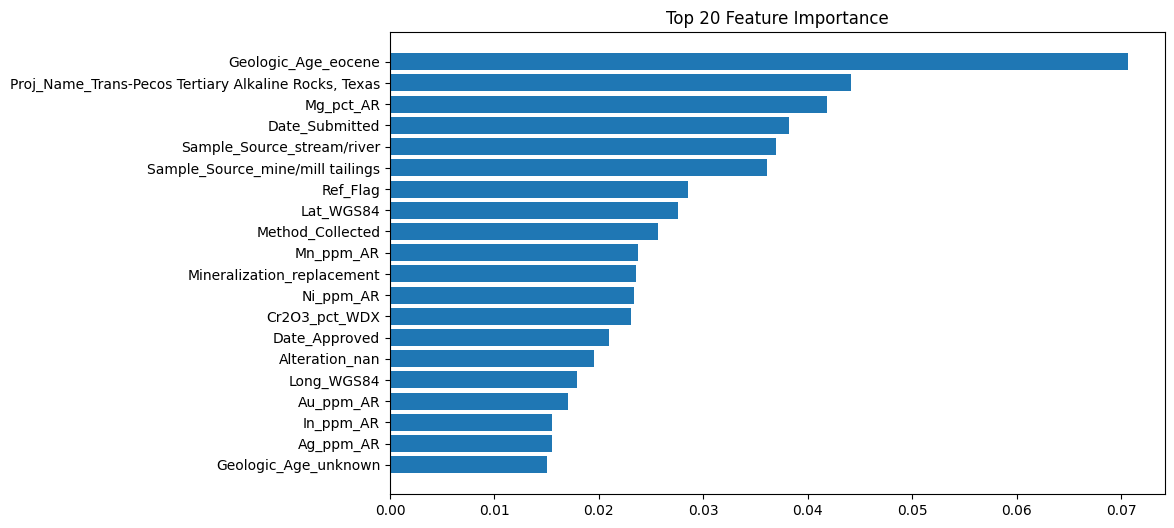

In [47]:
importances = model.feature_importances_
feature_names = X.columns

sorted_idx = importances.argsort()[::-1]

top_n = 20
top_features_idx = sorted_idx[:top_n]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[top_features_idx], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_features_idx])
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()
plt.show()


**Distribution Analysis**

In [50]:
import numpy as np

def clean_geologic_age(age):
    if pd.isna(age):
        return 'unknown'
    age = age.lower()
    age = age.split(' ')[0]
    return age

emri_data['Geologic_Age_Cleaned'] = emri_data['Geologic_Age'].apply(clean_geologic_age)
geologic_age_mapping = {
    'archean': 1,
    'paleoproterozoic': 2,
    'mesoproterozoic': 3,
    'neoproterozoic': 4,
    'proterozoic': 5,
    'cambrian': 6,
    'ordovician': 7,
    'silurian': 8,
    'devonian': 9,
    'mississippian': 10,
    'pennsylvanian': 11,
    'carboniferous': 12,
    'permian': 13,
    'triassic': 14,
    'jurassic': 15,
    'cretaceous': 16,
    'paleocene': 17,
    'eocene': 18,
    'oligocene': 19,
    'miocene': 20,
    'pliocene': 21,
    'pleistocene': 22,
    'holocene': 23,
    'quaternary': 24,
    'unknown': 0
}
emri_data['Geologic_Age_Encoded'] = emri_data['Geologic_Age_Cleaned'].map(geologic_age_mapping)
print(emri_data[['Geologic_Age', 'Geologic_Age_Cleaned', 'Geologic_Age_Encoded']].head())


  Geologic_Age Geologic_Age_Cleaned  Geologic_Age_Encoded
0   ordovician           ordovician                   7.0
1   ordovician           ordovician                   7.0
2   ordovician           ordovician                   7.0
3   ordovician           ordovician                   7.0
4   ordovician           ordovician                   7.0


In [52]:
print(emri_data[['Geologic_Age', 'Geologic_Age_Cleaned', 'Geologic_Age_Encoded']].sample(30))

           Geologic_Age Geologic_Age_Cleaned  Geologic_Age_Encoded
644                 NaN              unknown                   0.0
6621            miocene              miocene                  20.0
12094               NaN              unknown                   0.0
13549               NaN              unknown                   0.0
15489   mesoproterozoic      mesoproterozoic                   3.0
2356                NaN              unknown                   0.0
15836     pennsylvanian        pennsylvanian                  11.0
761                 NaN              unknown                   0.0
4729      pennsylvanian        pennsylvanian                  11.0
1349                NaN              unknown                   0.0
2390                NaN              unknown                   0.0
631                 NaN              unknown                   0.0
8605                NaN              unknown                   0.0
13793               NaN              unknown                  

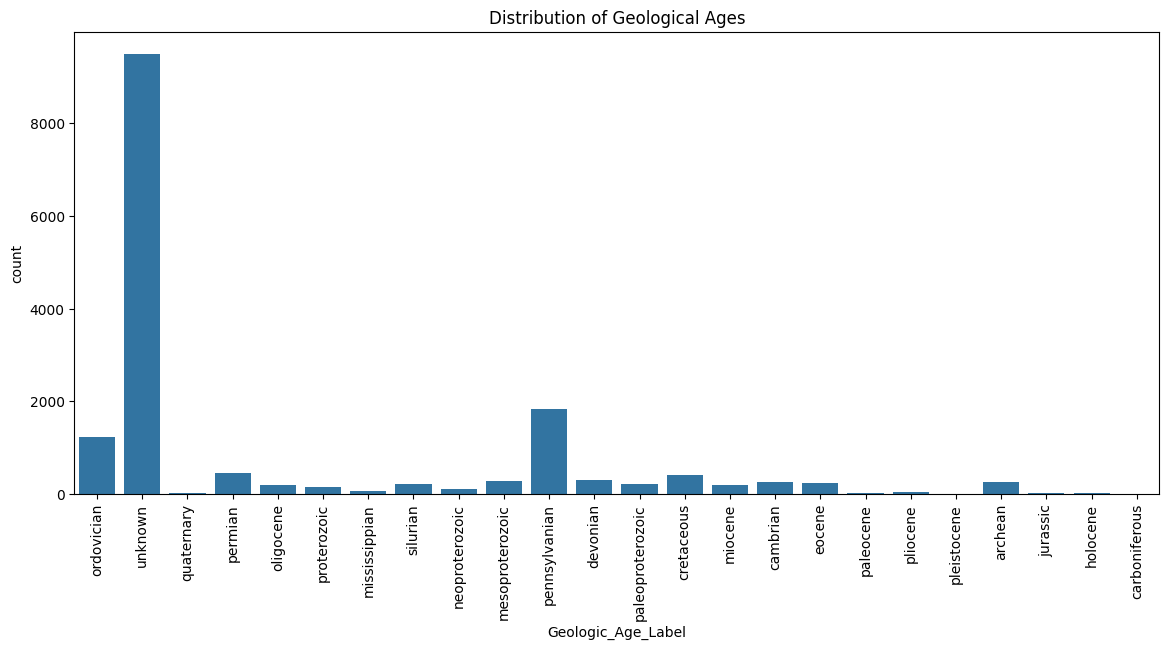

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

age_mapping = {
    0: 'unknown', 1: 'archean', 2: 'paleoproterozoic', 3: 'mesoproterozoic',
    4: 'neoproterozoic', 5: 'proterozoic', 6: 'cambrian', 7: 'ordovician',
    8: 'silurian', 9: 'devonian', 10: 'mississippian', 11: 'pennsylvanian',
    12: 'carboniferous', 13: 'permian', 14: 'triassic', 15: 'jurassic',
    16: 'cretaceous', 17: 'paleocene', 18: 'eocene', 19: 'oligocene',
    20: 'miocene', 21: 'pliocene', 22: 'pleistocene', 23: 'holocene',
    24: 'quaternary'
}

emri_data['Geologic_Age_Label'] = emri_data['Geologic_Age_Encoded'].map(age_mapping)

plt.figure(figsize=(14, 6))
sns.countplot(data=emri_data, x='Geologic_Age_Label')
plt.xticks(rotation=90)
plt.title('Distribution of Geological Ages')
plt.show()

**Class Imbalance Check**

The target variable, Geologic Age, represents different geologic periods. The dataset exhibits a significant class imbalance, which is addressed using SMOTE (Synthetic Minority Oversampling Technique) to balance the classes before modeling. This step ensures the machine learning model is not biased toward the majority classes​.

In [68]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original class distribution:", Counter(y))

minority_class_samples = min(Counter(y).values())
n_neighbors = min(3, minority_class_samples - 1)

smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({11.0: 11227, 7.0: 1231, 0.0: 616, 13.0: 442, 16.0: 403, 9.0: 297, 3.0: 279, 6.0: 250, 1.0: 248, 2.0: 221, 18.0: 221, 8.0: 216, 20.0: 193, 19.0: 183, 4.0: 100, 10.0: 60, 21.0: 35, 17.0: 23, 15.0: 13, 22.0: 4, 23.0: 4})
Resampled class distribution: Counter({7.0: 11227, 11.0: 11227, 0.0: 11227, 13.0: 11227, 19.0: 11227, 10.0: 11227, 8.0: 11227, 4.0: 11227, 3.0: 11227, 9.0: 11227, 2.0: 11227, 16.0: 11227, 20.0: 11227, 6.0: 11227, 18.0: 11227, 17.0: 11227, 21.0: 11227, 22.0: 11227, 1.0: 11227, 15.0: 11227, 23.0: 11227})


**Classification Model**

A Random Forest Classifier is used to classify samples based on their geochemical measurements. The data is split into training and test sets, and the model is evaluated using a confusion matrix and classification report to assess precision, recall, and F1-scores for each class.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3253
         1.0       1.00      1.00      1.00      3454
         2.0       1.00      1.00      1.00      3342
         3.0       1.00      1.00      1.00      3297
         4.0       1.00      1.00      1.00      3354
         6.0       1.00      1.00      1.00      3387
         7.0       1.00      1.00      1.00      3315
         8.0       1.00      1.00      1.00      3366
         9.0       1.00      1.00      1.00      3362
        10.0       1.00      1.00      1.00      3471
        11.0       1.00      0.99      1.00      3357
        13.0       1.00      1.00      1.00      3268
        15.0       1.00      1.00      1.00      3347
        16.0       1.00      1.00      1.00      3367
        17.0       1.00      1.00      1.00      3439
        18.0       1.00      1.00      1.00      3382
        19.0       1.00      1.00      1.00      3389
   

**Cross-Validation and Feature Importance**

The model's performance is further evaluated using cross-validation, and the top 20 most important features (based on feature importance from the Random Forest model) are visualized using a bar plot​.

In [70]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.99944862 0.99983034 0.99711577 0.99756113 0.98530316]
Mean cross-validation score: 0.9958518046403906


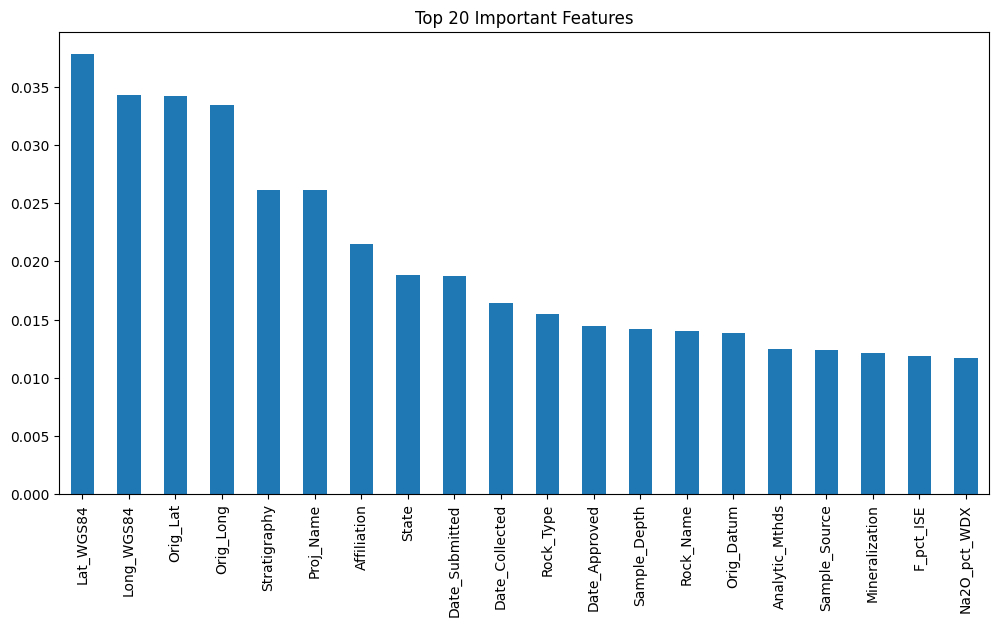

In [71]:
importances = model.feature_importances_
feature_names = X.columns

import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feature_importances.head(20).plot(kind='bar')
plt.title("Top 20 Important Features")
plt.show()


In [72]:
# Load the additional CSVs
data_dictionary_path = '/content/drive/MyDrive/EDA/Data/EMRI_DataDictionary.csv'
limits_analytical_path = '/content/drive/MyDrive/EDA/Data/Limits_AnalyticalMethods.csv'
qaqc_values_path = '/content/drive/MyDrive/EDA/Data/QAQC_Values.csv'

# Load each CSV into a DataFrame
data_dictionary = pd.read_csv(data_dictionary_path, encoding='ISO-8859-1')
limits_analytical = pd.read_csv(limits_analytical_path, encoding='ISO-8859-1')
qaqc_values = pd.read_csv(qaqc_values_path, encoding='ISO-8859-1')

# Preview the first few rows of each DataFrame
print("Data Dictionary Preview:")
print(data_dictionary.head())

print("\nLimits Analytical Methods Preview:")
print(limits_analytical.head())

print("\nQA/QC Values Preview:")
print(qaqc_values.head())


Data Dictionary Preview:
   SortOrder    Tblname AttributeLabel  \
0          1  EMRI_Data         Lab_ID   
1          2  EMRI_Data       Field_ID   
2          3  EMRI_Data    Prev_Lab_ID   
3          4  EMRI_Data           IGSN   
4          5  EMRI_Data    Parent_IGSN   

                                AttributeDescription AttributeUnit  
0  Unique identifier assigned to each submitted s...           NaN  
1  The identifier originally assigned to a sample...           NaN  
2  The unique identifier previously assigned to a...           NaN  
3  Unique International Geo Sample Number (IGSN; ...           NaN  
4  The IGSN identifier assigned to the parent sam...           NaN  

Limits Analytical Methods Preview:
   SortOrder  Analytic_Mthds Constituent  LowerDetectLimit  UpperDetectLimit  \
0          1  C_ICPOES_MS-60          Al              0.01              25.0   
1          2  C_ICPOES_MS-60          Ca              0.01              35.0   
2          3  C_ICPOES_MS-60    

**Data Dictionary (EMRI_DataDictionary.csv)**

**Purpose:** This file contains descriptions of the attributes in your primary dataset. It helps to understand the meaning, units, and context of each column.

In [73]:
data_dict_mapping = dict(zip(data_dictionary['AttributeLabel'], data_dictionary['AttributeDescription']))
print(data_dict_mapping)  # Use this to reference columns in your main analysis

{'Lab_ID': 'Unique identifier assigned to each submitted sample by USGS Analytical Chemistry Sample Control', 'Field_ID': 'The identifier originally assigned to a sample by collecting party or sample submitter.  Field_ID values may not be unique in this database.', 'Prev_Lab_ID': 'The unique identifier previously assigned to a sample when analyzed earlier and the ID by which the sample is identified in the USGS National Sample Archive.', 'IGSN': 'Unique International Geo Sample Number (IGSN; https://www.igsn.org) assigned by the System for Earth Sample Registration (SESAR, http://www.geosamples.org) or another Allocating Agent', 'Parent_IGSN': 'The IGSN identifier assigned to the parent sample, if any, from which material was sub-sampled', 'Ref_Flag': "A 'yes'/'no' field that identifies whether the sample is Geologic Reference Material (GRM). USGS GRMs are identified by name in the QAQC field. Submitter supplied Reference Materials may be also flagged here. All GRMs were submitted blin

**Limits of Analytical Methods (Limits_AnalyticalMethods.csv)**

**Purpose:** This file contains detection limits for various constituents in your dataset. These limits are critical for ensuring that measurements are within valid ranges.

In [74]:
# Example: Validate Al_pct_ICP60
al_lower_limit = limits_analytical[limits_analytical['Constituent'] == 'Al']['LowerDetectLimit'].values[0]
al_upper_limit = limits_analytical[limits_analytical['Constituent'] == 'Al']['UpperDetectLimit'].values[0]

invalid_al = emri_data_clean[(emri_data_clean['Al_pct_ICP60'] < al_lower_limit) | (emri_data_clean['Al_pct_ICP60'] > al_upper_limit)]
print("Invalid Al_pct_ICP60 values:")
print(invalid_al)


Invalid Al_pct_ICP60 values:
      Ref_Flag  QAQC_Sample  Proj_Name  Affiliation  Date_Submitted  \
7040         0           13         44           24             108   

      Date_Approved  Lat_WGS84  Long_WGS84  Orig_Lat  Orig_Long  ...  \
7040            149   33.97016    -81.4943  33.97016   -81.4943  ...   

      Tm_ppb_ICPH2O  U_ppb_ICPH2O  V_ppb_ICPH2O  W_ppb_ICPH2O  Y_ppb_ICPH2O  \
7040       0.742982     31.997798      2.500175      2.064561      66.23693   

      Yb_ppb_ICPH2O  Zn_ppb_ICPH2O  Zr_ppb_ICPH2O  Geologic_Age_Encoded  \
7040       4.616667   20595.035088      -6.421053                   0.0   

      Geologic_Age_Label  
7040                  20  

[1 rows x 433 columns]


**QA/QC Values (QAQC_Values.csv)**

**Purpose:** This file contains quality control values for each constituent. It helps to ensure that the measurements fall within preferred or mean ranges.

In [75]:
preferred_al_value = qaqc_values[qaqc_values['ValueType'] == 'Preferred']['Al_pct_ICP60'].values
deviation_al = emri_data_clean[~emri_data_clean['Al_pct_ICP60'].isin(preferred_al_value)]
print("Values deviating from QA/QC Preferred Al_pct_ICP60 values:")
print(deviation_al)

Values deviating from QA/QC Preferred Al_pct_ICP60 values:
       Ref_Flag  QAQC_Sample  Proj_Name  Affiliation  Date_Submitted  \
0             0           13         27            3              72   
1             0           13         27            3              72   
2             0           19         27            3              72   
3             0           13         27            3              72   
4             0           13         27            3              72   
...         ...          ...        ...          ...             ...   
16261         0           13         16           23              21   
16262         0           13         16           23              21   
16263         0           19         16           23              21   
16264         0           13         16           23              21   
16265         1            8         16           23              21   

       Date_Approved  Lat_WGS84  Long_WGS84   Orig_Lat   Orig_Long  ...  \
0

**Conclusion**

This EDA provides a comprehensive understanding of the dataset, including feature distributions, correlations, and model readiness for classifying geochemical samples. The project also involves handling complex issues like missing values, outliers, multicollinearity, and class imbalance, ensuring the data is prepped for further analysis or machine learning tasks.